In [1]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils.feedinghabitatutils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish, IkaFishDebug

In [2]:
configuration_filepath = "./../data/ikamoana_config/IkaSim_Example_Fish_025_30.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.ika_params

{'start_distribution': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'seapodym_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/run-test/data/po_freeglorys_0.25x30d_1998_2019/skj_ref2018_freeglorys_reanalysis_025x30d_vgpm_Fref.xml',
 'forcing_dir': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'start_time': numpy.datetime64('2000-01-15'),
 'duration_time': 7776000,
 'delta_time': 8640,
 'output_delta_time': 8640,
 'spatial_limits': {'lonlim': (120.0, 290.0), 'latlim': (-40.0, 50.0)},
 'files_only': True,
 'forcing_files': ({},
  {'ocean': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/IkaSim_Example_025_30/IkaSim_Example_025_30_720d.nc'}),
 'fields_interp_method': 'nearest',
 'start_length': 26.43,
 'ageing_cohort': True,
 'number_of_cohorts': 1000,
 'start_dynamic_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age',
 'start_dynamic

In [4]:
my_sim.loadFields()

In [5]:
# my_sim.oceanToNetCDF("./../data/ikamoana_data", to_dataset=True)

In [6]:
my_sim.initializeParticleSet(particles_class=IkaFishDebug,
                             particles_number=5,
                             method="start_cell")

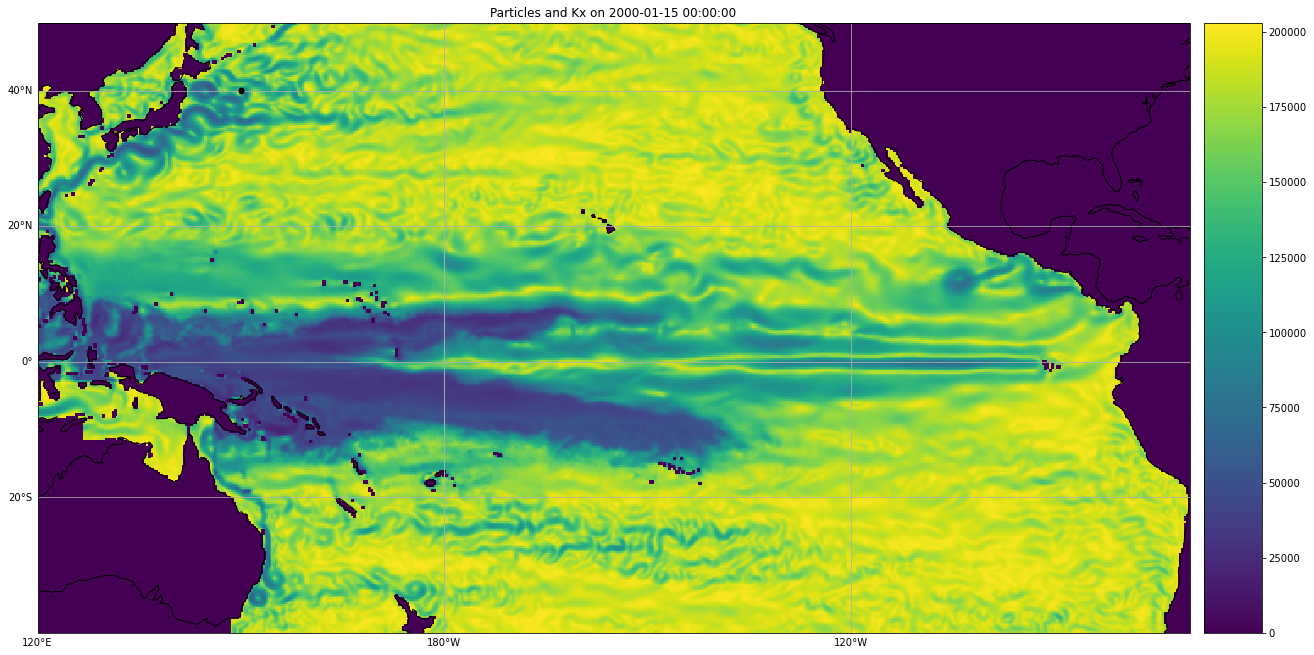

In [7]:
my_sim.fish.show(field=my_sim.ocean.Kx)

In [8]:
import parcels 
my_sim.runKernels(save=True)

INFO: Compiled ArrayIkaFishDebugCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionRerollLandBlock ==> /tmp/parcels-1000/libc1dc541b6d0ad3bdc34aaa73f69af80e_0.so
/home/ash/anaconda3/envs/ikamoana/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [9]:
len(my_sim.fish)

2

In [10]:
# my_sim.fish.show(field=my_sim.ocean.Kx, with_particles=True)

---

In [11]:
# my_sim.fish.show(field=my_sim.ocean.dKx_dx, with_particles=True)

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [13]:
filepath = "./IkaSim_Example_025_30.nc"
particle_file = xr.load_dataset(filepath)
particle_file

<xarray.Dataset>
Dimensions:       (traj: 5, obs: 901)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    trajectory    (traj, obs) float64 0.0 0.0 0.0 0.0 0.0 ... 4.0 4.0 4.0 4.0
    time          (traj, obs) datetime64[ns] 2000-01-15 ... 2000-04-14
    lat           (traj, obs) float32 40.08 40.27 39.91 ... 15.99 16.67 17.08
    lon           (traj, obs) float32 150.1 149.9 149.0 ... 133.8 133.8 132.8
    z             (traj, obs) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Tx            (traj, obs) float32 0.0 -1.876e-06 ... -0.0006824 0.0009468
    ...            ...
    Cx            (traj, obs) float32 0.0 -0.08788 ... -0.0005901 -0.007781
    Cy            (traj, obs) float32 0.0 -0.01029 0.0003184 ... 0.02182 0.0122
    Ax            (traj, obs) float32 0.0 -0.01265 ... -0.006538 -0.005144
    Ay            (traj, obs) float32 0.0 0.01363 0.01144 ... 0.001404 0.001588
    Rx_component  (traj, obs) float32 0.0 8.108e+04 ... 1.204e+05 1.238e+05
    Ry_component  (traj, obs) float32 0.0 8.108e+04 ... 1.202e+05 1.24e+05
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical

In [14]:
mean_Dx = np.absolute(particle_file['Dx']).mean(axis=0)
mean_Dy = np.absolute(particle_file['Dy']).mean(axis=0)
mean_Cx = np.absolute(particle_file['Cx']).mean(axis=0)
mean_Ax = np.absolute(particle_file['Ax']).mean(axis=0)
mean_Tx = np.absolute(particle_file['Tx']).mean(axis=0)

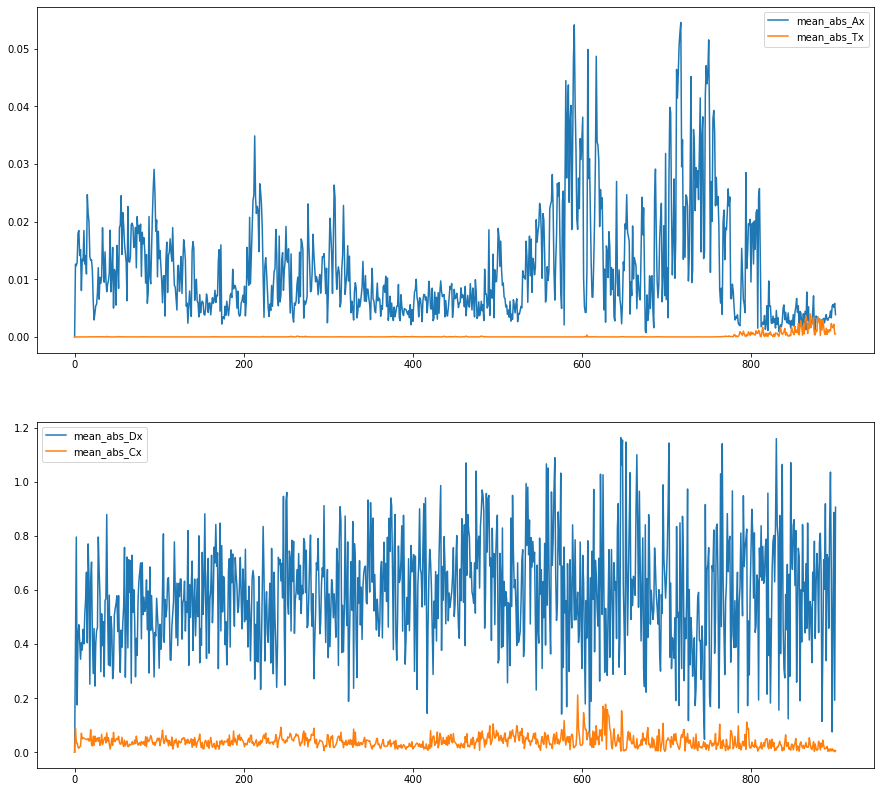

In [15]:
fig, (axe1, axe2) = plt.subplots(2,1,figsize=(15,14))

axe1.plot(mean_Ax)
axe1.plot(mean_Tx)
axe1.legend(["mean_abs_Ax","mean_abs_Tx"])

axe2.plot(mean_Dx)
axe2.plot(mean_Cx)
axe2.legend(["mean_abs_Dx","mean_abs_Cx"])

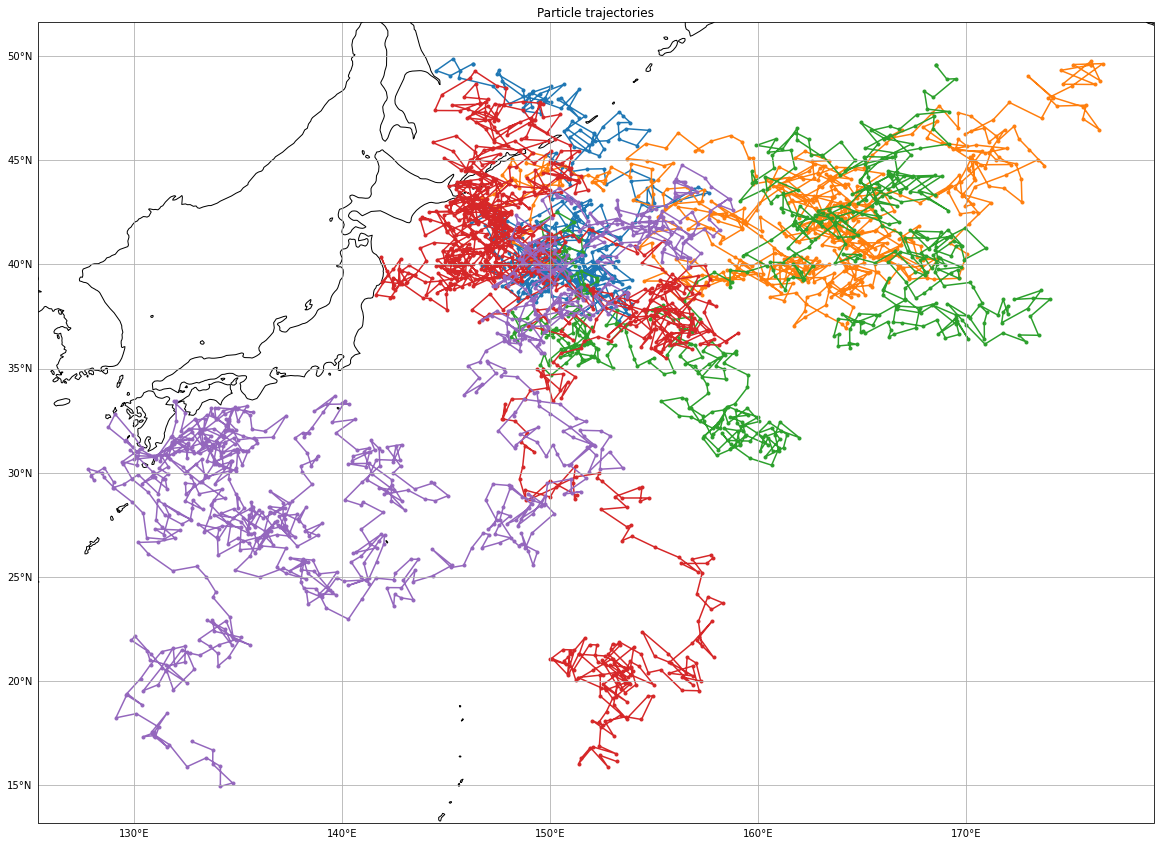

<Figure size 1440x1440 with 0 Axes>

In [16]:
from parcels import plotTrajectoriesFile

plot = plotTrajectoriesFile(filepath, show_plt=False, central_longitude=180)
plot.figure().set_size_inches([20,20])

In [17]:
list(particle_file.keys())

['trajectory',
 'time',
 'lat',
 'lon',
 'z',
 'Tx',
 'Ty',
 'age_class',
 'loop_count',
 'f_lat',
 'f_lon',
 'Dx',
 'Dy',
 'Cx',
 'Cy',
 'Ax',
 'Ay',
 'Rx_component',
 'Ry_component']

In [18]:
particle_file.isel(traj=0)

<xarray.Dataset>
Dimensions:       (obs: 901)
Dimensions without coordinates: obs
Data variables: (12/19)
    trajectory    (obs) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    time          (obs) datetime64[ns] 2000-01-15 2000-01-15T02:24:00 ... NaT
    lat           (obs) float32 40.08 40.27 39.91 40.37 ... nan nan nan nan
    lon           (obs) float32 150.1 149.9 149.0 149.0 ... nan nan nan nan
    z             (obs) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    Tx            (obs) float32 0.0 -1.876e-06 3.297e-07 ... nan nan nan
    ...            ...
    Cx            (obs) float32 0.0 -0.08788 -0.03989 -0.005939 ... nan nan nan
    Cy            (obs) float32 0.0 -0.01029 0.0003184 -0.0416 ... nan nan nan
    Ax            (obs) float32 0.0 -0.01265 -0.01717 -0.01417 ... nan nan nan
    Ay            (obs) float32 0.0 0.01363 0.01144 -0.008694 ... nan nan nan
    Rx_component  (obs) float32 0.0 8.108e+04 8.048e+04 ... nan nan nan
    Ry_component  (obs) float32 0.0 8.108e+04 8.048e+04 ... nan nan nan
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical